# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving yulu_rental.csv to yulu_rental.csv


In [4]:
df = pd.read_csv('yulu_rental.csv', index_col=0)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
print(df.columns)


Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [6]:
print(df.index)


Index(['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
       '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
       '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
       '2011-01-01 09:00:00',
       ...
       '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
       '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
       '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
       '2012-12-19 23:00:00'],
      dtype='object', name='datetime', length=10886)


In [7]:
# Перетворення datetime у правильний формат
df.index = pd.to_datetime(df.index)


# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [8]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [9]:
df.shape

(10886, 19)

In [10]:
df['interval'] = df.index.to_series().diff()
df['interval'].value_counts().head()


,count
interval,
0 days 01:00:00,10820
0 days 02:00:00,36
12 days 01:00:00,13
11 days 01:00:00,8
0 days 03:00:00,5


In [11]:
# бачимо, що у нас є 10820 рядків та 19 стовпців.
# найчастіше зустрічається інтервал 1 година
# (тобто в більшості випадків в одному рядку містяться дані саме за такий період часу)

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


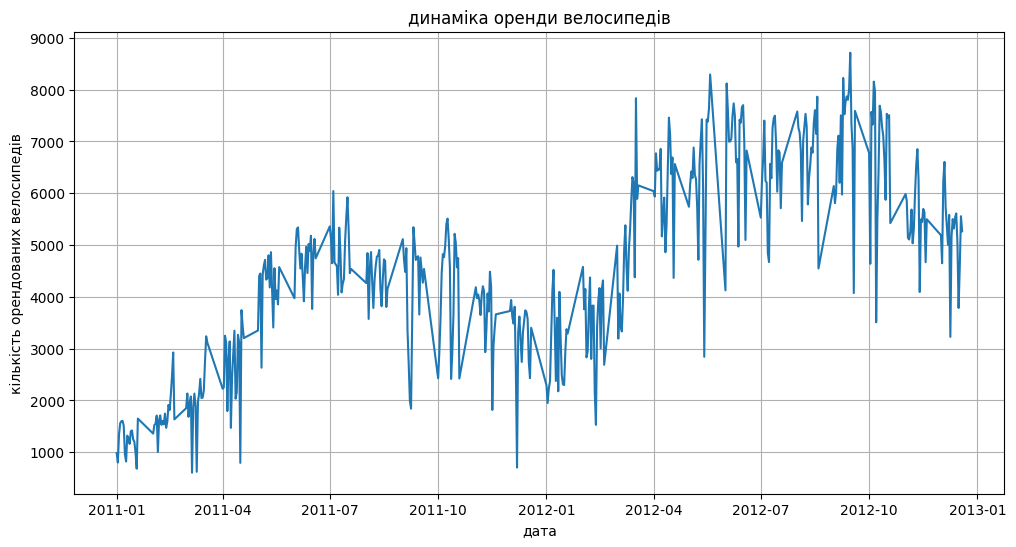

In [12]:
dr = df.groupby('date')['count'].sum()

dr.plot(
    kind='line',
    figsize=(12, 6),
    title='динаміка оренди велосипедів',
    xlabel='дата',
    ylabel='кількість орендованих велосипедів',
    grid=True
);

In [43]:
# спробуємо зробити графік з moving average
drr = dr.rolling(7).mean()

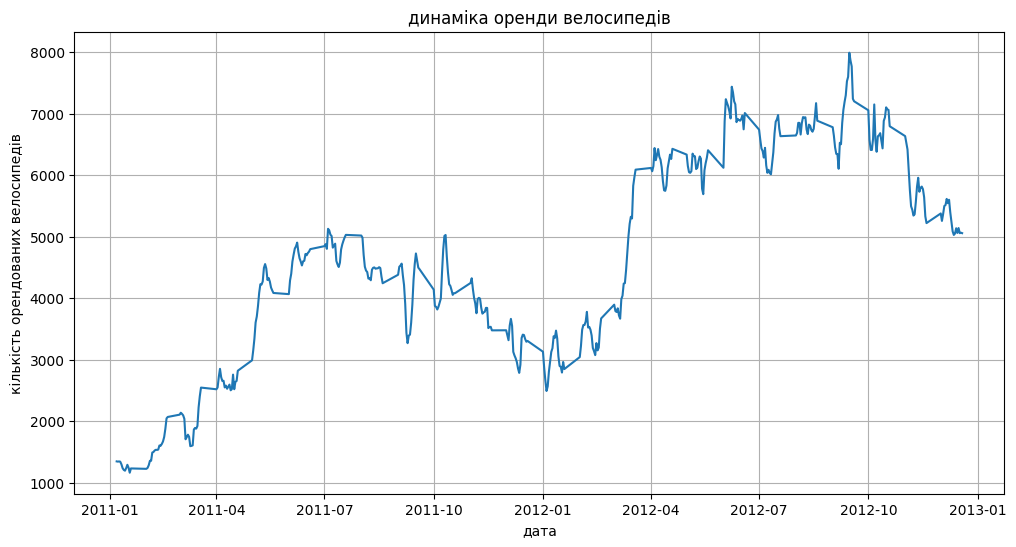

In [14]:
drr.plot(
    kind='line',
    figsize=(12, 6),
    title='динаміка оренди велосипедів',
    xlabel='дата',
    ylabel='кількість орендованих велосипедів',
    grid=True
);

In [15]:
rent_count = df.groupby(['year', 'month'])['count'].sum()

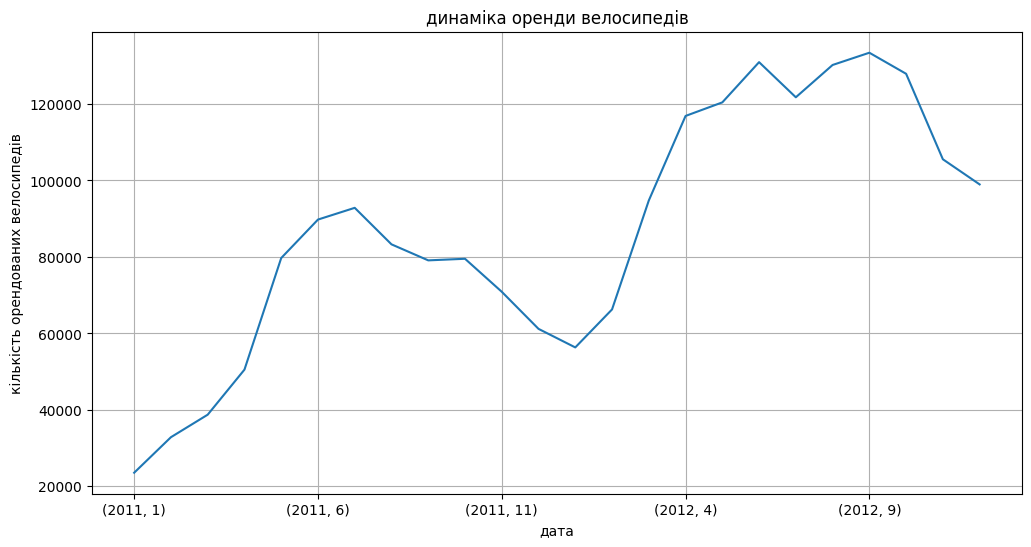

In [16]:
rent_count.plot(
    kind='line',
    figsize=(12, 6),
    title='динаміка оренди велосипедів',
    xlabel='дата',
    ylabel='кількість орендованих велосипедів',
    grid=True
);

In [17]:
# 1. заломи (різкі падіння/піки між сусідніми днями) з’являються, тому що:

#  1. у даних є щоденні значення, а оренди велосипедів мають дуже нестабільну добову змінність
#   (дощ, температура, вихідні/свята, годинні піки)
#  2. на графіку занадто багато точок
#  3. оренди мають сильні “спади” через погодні умови
#   (наприклад, у зимові дні з опадами або холодом майже нульові оренди, що спричинює різкий провал)
# я спробувала візуально зменшити заломи для кращої читабельності графіку через додавання moving average
# (другий графік) та групування не за датою, а за місяцясм


# 2. загальні тенденції вимальовуються дуже чітко:

# відчутне зростання з початку 2011 до середини 2012
# ймовірні причини:
#  1. популярність сервісу зростає
#  2. збільшується кількість станцій / велосипедів
#  3. люди все більше користуються сервісом з настанням чергового літа

# 3. так, бачимо дуже виражену кореляцію між сезоном і кількістю оренд.

# весна: стрімке зростання
# літо: найвищі піки
# осінь: поступове падіння
# зима: різке зменшення оренд
# це класична сезонність для подібних сервісів

# 4. є періоди з аномально високими і низькими значеннями.

# ймовірні причини аномально високих:
#   1. дуже теплі сонячні вихідні
#   2. свята, фестивалі, події
#   3. пік туристичного сезону

# причини аномально низьких:
#   1. сильний дощ / злива
#   2. сніг і холод
#   3. технічні збої, помилки в даних (бачимо також що загалом маємо дані лише з 1 по 19 числа щомісяця, причини невідомі)


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [18]:
se = df.groupby('season')['count'].sum()

In [19]:
seasons = se.rename(index={1: 'зима', 2: 'весна', 3: 'літо', 4: 'осінь'})
print(seasons)

season
зима     312498
весна    588282
літо     640662
осінь    544034
Name: count, dtype: int64


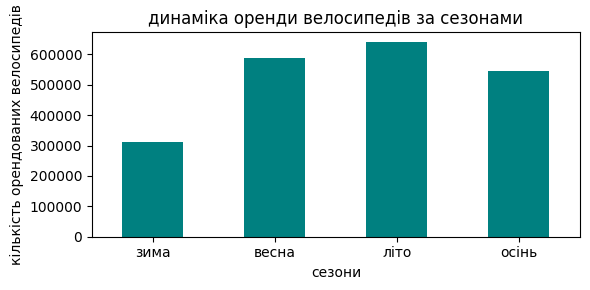

In [20]:
seasons.plot.bar(
    figsize=(6, 3),
    color='teal',
    title='динаміка оренди велосипедів за сезонами',
    xlabel='сезони',
    ylabel='кількість орендованих велосипедів',
)
plt.xticks(rotation=0)
plt.tight_layout()

In [21]:
# з діаграми бачимо, що найбільшу кількість велосипедів орендують влітку,
# а найменшу - взимку (показник фактично в два рази менший ніж влітку),
# що досить очікувано: в сніжну та холодну погоду не буде багато
# людей, які бажають пересуватися в такий спосіб.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [22]:
ms = df.groupby('month')['count'].sum()
mss = ms.rename({1: 'січень', 2: 'лютий', 3: 'березень', 4: 'квітень', 5: 'травень', 6: 'червень', 7: 'липень', 8: 'серпень', 9: 'вересень', 10: 'жовтень', 11: 'листопад', 12: 'грудень'})
mss

,count
month,
січень,79884
лютий,99113
березень,133501
квітень,167402
травень,200147
червень,220733
липень,214617
серпень,213516
вересень,212529


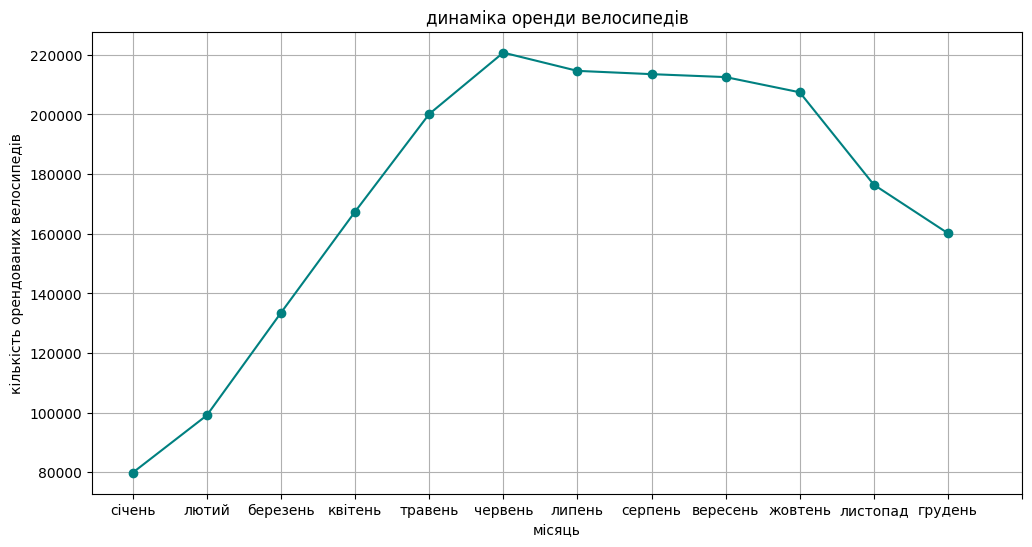

In [23]:
mss.plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    color='teal',
    title='динаміка оренди велосипедів',
    xlabel='місяць',
    ylabel='кількість орендованих велосипедів',
    grid=True,
    xticks=range(0,13)
);

In [24]:
# графік повністю підтверджує результати попереднього завдання: очевидною є тенденція позитивної кореляції
# між кількістю орендованих велосипедів та температурою повітря, найнижчі показники має січень, і з цієї точки до червня показники
# поступово стабільно підіймаються і досягають свого піку, після чого впродовж другої половини року поступово зменшуються.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

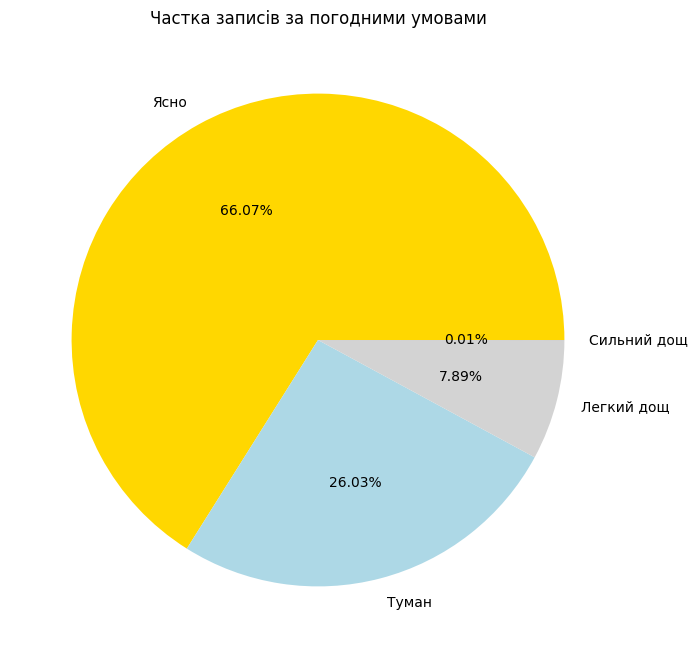

In [25]:
weather = df.groupby('weather')['day'].count()
weather

,day
weather,
1,7192
2,2834
3,859
4,1


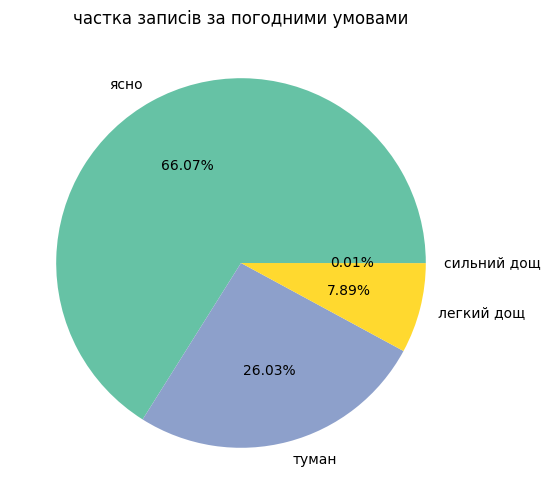

In [26]:
weather.plot.pie(
    figsize=(6, 6),
    autopct='%1.2f%%',
    labels=['ясно', 'туман', 'легкий дощ', 'сильний дощ'],
    title='частка записів за погодними умовами',
    colormap='Set2',
    ylabel='',
);

In [27]:
# в датасеті переважає сонячна погода
# за всі роки був лише 1 випадок сильного дощу (0.01%)
# очевидно що погодні умови чи не найбільше з усіх параметрів впливають на
# попит на оренду велосипедів. мало хто буде їздити в дощ або в туман, коли погана видимість,
# в той час як в сонячну погоду зазвичай набагато більше охочих проїхатись.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [28]:
weather_labels = {
    1: 'ясно',
    2: 'туман',
    3: 'легкий дощ',
    4: 'сильний дощ'
}

df['weather_name'] = df['weather'].map(weather_labels)

,0
count,"Axes(0.125,0.11;0.775x0.77)"


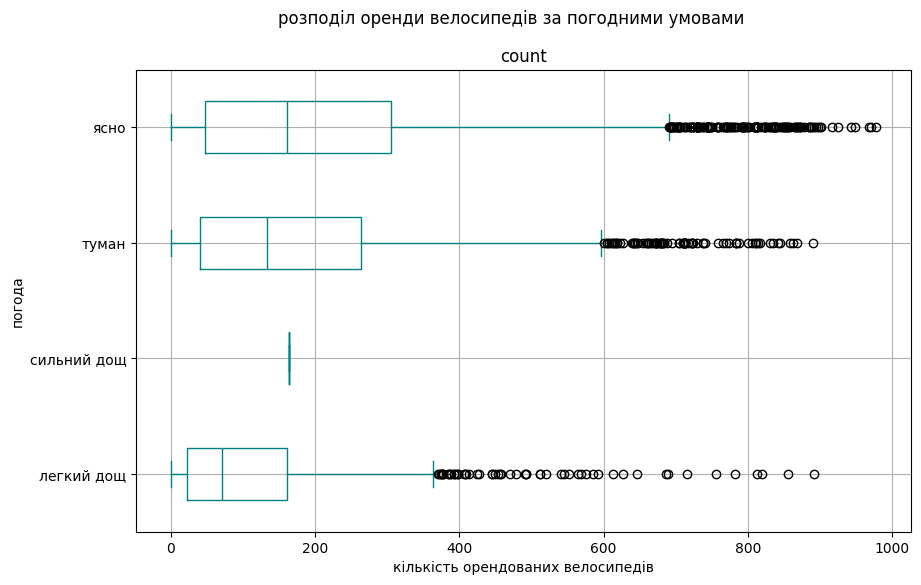

In [41]:
df.plot.box(
    figsize=(10, 6),
    column='count',
    by='weather_name',
    vert=False,
    grid=True,
    color='teal',
    title='розподіл оренди велосипедів за погодними умовами',
    xlabel='кількість орендованих велосипедів',
    ylabel='погода'
)

In [30]:
# найбільший розкид бачимо у ясну погоду (про це свідчить найбільш розтягнута коробка та найдовші вуса)
# викидів дуже багато майже в будь-яку погоду, окрім сильного дощу (це всі чорні точки які розташовані праворуч від коробки з вусами)
# медіанне значення оренди найвище при ясній погоді, що є очікуваним результатом (це одразу видно з графіка, бо і сама коробка,
# і медіанна лінія в коробці зміщені правіше по осі Х ніж в інших типах погоди)

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

In [31]:
df['season_'] = df['season'].astype('category')

<Axes: title={'center': 'залежність кількості орендованих велосипедів від температури'}, xlabel='кількість орендованих велосипедів', ylabel='температура'>

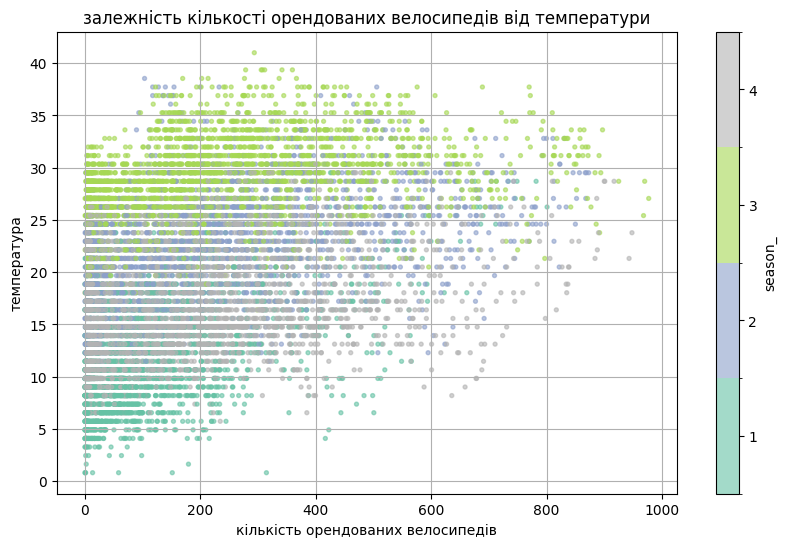

In [34]:
df.plot.scatter(
    figsize=(10, 6),
    x='count',
    y='temp',
    c='season_',
    colormap='Set2',
    s = 8,
    alpha=0.6,
    xlabel='кількість орендованих велосипедів',
    ylabel='температура',
    title='залежність кількості орендованих велосипедів від температури',
    grid=True
)

In [35]:
# так, зв’язок є - і він досить чіткий: кількість оренд зростає зі зростанням температури

# на графіку бачимо таку тенденцію:
# при низьких температурах оренд дуже мало,
# при комфортних температурах (15-25°) оренди стають значно вищими,
# при ще тепліших умовах (25-35°) з’являються пікові значення

# це позитивний кореляційний зв’язок: чим тепліше - тим більше людей бере велосипеди

# але на дуже високих температурах (35-40°) дані показують деяке зниження розкиду:
# точок менше, тобто люди охоче катаються, коли тепло, але надто висока спека може
# зменшувати кількість оренд

# зв’язок позитивний, але нелінійний - після 32-35° попит не росте в такому темпі як раніше

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [36]:
wd = df.groupby(['weekday_num', 'weekday'])[['casual', 'registered']].mean()
wd

,,casual,registered
weekday_num,weekday,,
0,Monday,29.843972,160.546744
1,Tuesday,22.979207,166.744639
2,Wednesday,22.521599,165.889749
3,Thursday,24.007083,173.289118
4,Friday,31.001962,166.842381
5,Saturday,63.625000,133.040404
6,Sunday,57.051298,123.788474


<Axes: xlabel='weekday'>

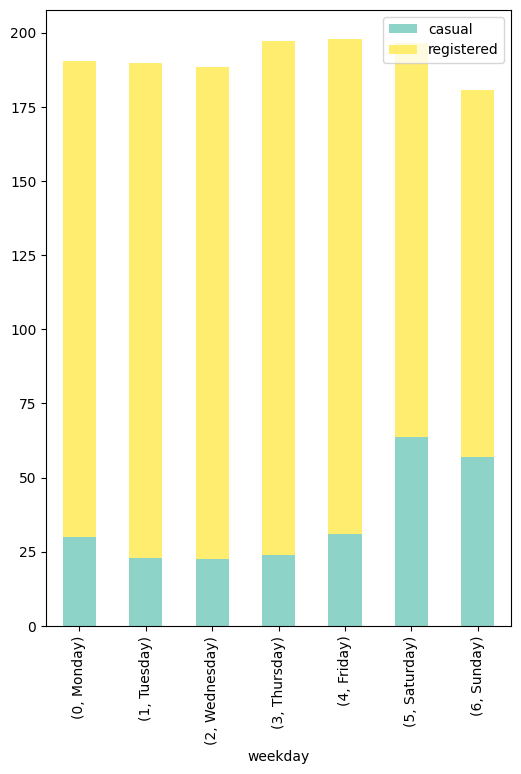

In [37]:
wd.plot(
    figsize=(6, 8),
    kind='bar',
    stacked=True,
    colormap='Set3',
    xlabel='weekday'
)

In [42]:
# бачимо що відсоток зареєстрованих користувачів вищий у будні дні
# (це можуть бути до прикладу люди які звикли орендувати велосипеди аби добиратися на роботу/з роботи),
# в той час як відсоток випадкових клієнтів сервісу зростає у вихідні, що логічно:
# це можна пояснити тим, що у вихідні (особливо з гарною погодою) більше людей виходить
# на прогулянку і відповідно відсоток спонтанних рішень орендувати велосипеди зростає.